In [58]:
%matplotlib notebook

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [60]:
file = '../Analysis/NCVS_dirty.csv'

In [61]:
df = pd.read_csv(file)

In [62]:
df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
0,1993,2418.22376,1,1,2,1,2,1,5,NaN,...,2,2,0,2,5,3,0,0.0,2.0,4
1,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,2,0,1,4,2,1,1.0,2.0,3
2,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,2,0,1,4,2,1,1.0,2.0,3
3,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,2,0,1,4,2,1,1.0,2.0,3
4,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,1,3,1,3,1,1,1.0,2.0,3


In [63]:
df = df[df.year != 1993]
df = df[df.year != 1994]
df = df[df.year != 1995]

In [64]:
df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
12974,1996,3451.43740,1,1,2,1,5,2,4,0.0,...,1,2,0,1,4,2,0,0.0,2.0,5
12975,1996,2377.30718,2,1,2,1,6,2,4,0.0,...,2,2,0,1,4,2,0,0.0,2.0,2
12976,1996,2687.23144,1,1,2,1,5,2,4,1.0,...,1,3,5,1,4,2,0,0.0,2.0,3
12977,1996,2555.83758,2,1,2,1,5,2,6,2.0,...,2,2,0,1,4,2,0,0.0,2.0,3
12978,1996,3017.36110,1,1,2,1,5,1,3,1.0,...,2,2,0,1,4,2,0,0.0,2.0,3


In [65]:
# Define dictionaries for replacing all of the variables
rep_ager = {1 : "12 to 14",
            2 : "15 to 17",
            3 : "18 to 20",
            4 : "21 to 24",
            5 : "25 to 34",
            6 : "35 to 49",
            7 : "50 to 64",
            8 : "65 or older"}

rep_newcrime = {1 : "Violent victimization",
                2 : "Personal theft/larceny"}

rep_hispanic = {1 : "Hispanic",
                2 : "Non-Hispanic"}

rep_hincome = {1 : "Less than $7,500",
               2 : "$7,500 to $14,999",
               3 : "$15,000 to $24,999",
               4 : "$25,000 to $34,999",
               5 : "$35,000 to $49,999",
               6 : "$50,000 to $74,999",
               7 : "$75,000 or more",
               88 : "Unknown"}

rep_injury = {0 : "Not Injured",
              1 : "Injured"}

rep_locationr = {1 : "At or near victim's home",
                 2 : "At or near friend, neighbor, or relative's home",
                 3 : "Commercial place, parking lot, or other public area",
                 4 : "School",
                 5 : "Other location"}

rep_msa = {1 : "Principal city within MSA",
           2 : "Not part of principal city within MSA",
           3 : "Outside MSA"}

rep_marital2 = {1 : "Never Married",
                2 : "Married",
                3 : "Widowed",
                4 : "Divorced",
                5 : "Separated"}

rep_treatment = {0 : "Not injured",
                 1 : "Not treated for injury",
                 2 : "Treated at scene, home, medical office, or other location"}

rep_popsize = {0 : "Not a place",
               1 : "Under 100,000",
               2 : "100,000 to 249,999",
               3 : "250,000 to 499,999",
               4 : "500,000 to 999,999",
               5 : "1 million or more"}

rep_weapon = {1 : "Yes, offender had weapon",
              2 : "No, offender did not have weapon",
              3 : "Do not know if offender had weapon"}

rep_race1r = {1 : "White",
              2 : "Black",
              3 : "Other"}

rep_ethnic1r = {1 : "Non-Hispanic white",
                2 : "Non-Hispanic black",
                3 : "Non-Hispanic other",
                4 : "Hispanic"}

rep_region = {1 : "Northeast",
              2 : "Midwest",
              3 : "South",
              4 : "West"}

rep_notify = {1 : "Yes, reported to the police",
              2 : "No, did not report to the police",
              3 : "Do not know"}

rep_gender = {1 : "Male",
              2 : "Female"}

rep_newoff = {1 : "Rape/sexual assault",
              2 : "Robbery",
              3 : "Aggravated assault",
              4 : "Simple assault",
              5 : "Personal theft"}

rep_vicservices = {1 : "Services received from victim service agencies",
                   2 : "No services received from victim service agencies"}

rep_direl = {1 : "Intimates",
             2 : "Other relatives",
             3 : "Well-known/casual acquaintances",
             4 : "Stranger",
             5 : "Do not know relationship",
             6 : "Do not know number of offenders"}

rep_seriousviolent = {1 : "Violent crime excluding simple assault",
                      2 : "Simple assault",
                      3 : "Personal theft",
                      4 : "Property crime"}

rep_weapcat = {0 : "No weapon",
               1 : "Firearm",
               2 : "Knife",
               3 : "Other type weapon",
               4 : "Type weapon unknown",
               5 : "Do not know if offender had weapon"}

In [127]:
#df["ager"].replace(rep_ager ,inplace = True)
#df["newcrime"].replace(rep_newcrime ,inplace = True)
#df["ager"].replace(rep_ager ,inplace = True)
#df["newcrime"].replace(rep_newcrime ,inplace = True)
#df["hispanic"].replace(rep_hispanic ,inplace = True)
#df["hincome"].replace(rep_hincome ,inplace = True)
#df["injury"].replace(rep_injury ,inplace = True)
#df["locationr"].replace(rep_locationr ,inplace = True)
#df["msa"].replace(rep_msa ,inplace = True)
#df["marital2"].replace(rep_marital2 ,inplace = True)
#df["treatment"].replace(rep_treatment ,inplace = True)
#df["popsize"].replace(rep_popsize ,inplace = True)
#df["weapon"].replace(rep_weapon ,inplace = True)
#df["race1r"].replace(rep_race1r ,inplace = True)
#df["ethnic1r"].replace(rep_ethnic1r ,inplace = True)
#df["region"].replace(rep_region ,inplace = True)
#df["notify"].replace(rep_notify ,inplace = True)
#df["gender"].replace(rep_gender ,inplace = True)
#df["newoff"].replace(rep_newoff ,inplace = True)
#df["vicservices"].replace(rep_vicservices ,inplace = True)
#df["direl"].replace(rep_direl ,inplace = True)
#df["seriousviolent"].replace(rep_seriousviolent ,inplace = True)
#df["weapcat"].replace(rep_weapcat ,inplace = True)
df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr,race1r_vic
12974,1996,3451.43740,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999",Not a place,...,"No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,Other location,1.0
12975,1996,2377.30718,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"$25,000 to $34,999",Not a place,...,"No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home",1.0
12976,1996,2687.23144,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999","Under 100,000",...,Do not know if offender had weapon,Do not know if offender had weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public...",1.0
12977,1996,2555.83758,Female,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$50,000 to $74,999","100,000 to 249,999",...,"No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public...",1.0
12978,1996,3017.36110,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never Married,"$15,000 to $24,999","Under 100,000",...,"No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public...",1.0


In [98]:
df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr,race1r_vic
12974,1996,3451.43740,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999",Not a place,...,"No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,Other location,1.0
12975,1996,2377.30718,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"$25,000 to $34,999",Not a place,...,"No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home",1.0
12976,1996,2687.23144,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999","Under 100,000",...,Do not know if offender had weapon,Do not know if offender had weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public...",1.0
12977,1996,2555.83758,Female,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$50,000 to $74,999","100,000 to 249,999",...,"No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public...",1.0
12978,1996,3017.36110,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never Married,"$15,000 to $24,999","Under 100,000",...,"No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public...",1.0


In [68]:
#df.loc[df['notify'] == 8]

In [99]:
# Pie Chart 1:  "Gender"
gender_vic = df.groupby('gender')
gender_group = gender_vic.count()
gender_group

,year,weight,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,region,...,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr,race1r_vic
gender,,,,,,,,,,,,,,,,,,,,,
Female,23034,23034,23034,23034,23034,23034,23034,23034,23034,23034,...,23034,23034,23034,23034,23034,23034,23013,22792,23034,23034
Male,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,...,24026,24026,24026,24026,24026,24026,24005,23814,24026,24026


In [111]:
labels = ["Male", "Female"]
gender_count = gender_group["year"].tolist()
gender_count

[23034, 24026]

<IPython.core.display.Javascript object>


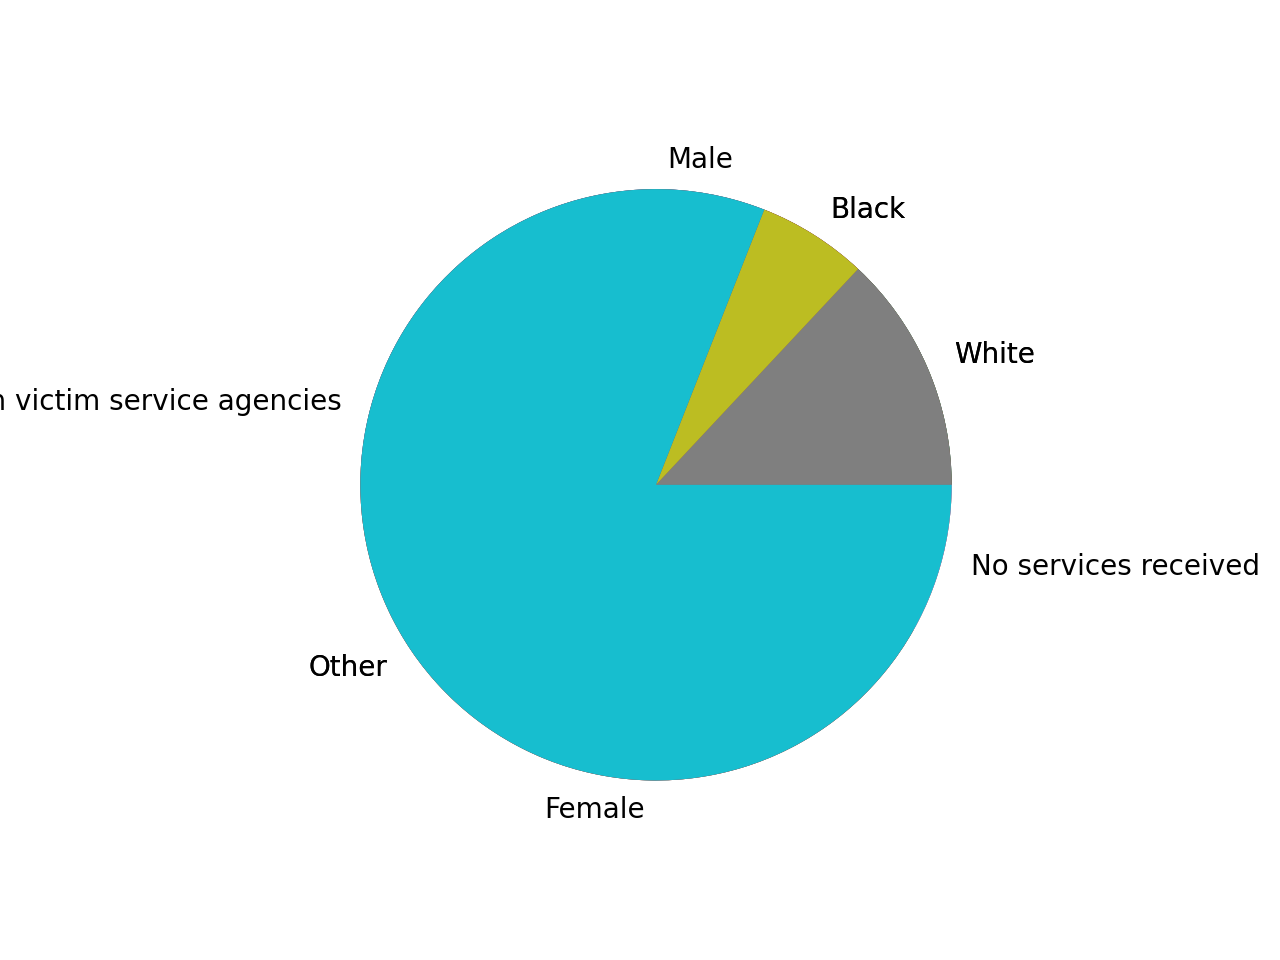

In [112]:
plt.pie(gender_count, labels=labels)
plt.show()

In [113]:
#Pie Chart 2: "Race"
race_df = df.groupby('race1r').count()

In [150]:
labels = ['White', 'Black', 'Other']
# type(race1r_vic)
plt.pie(race_df['race1r_vic'],labels=labels)
plt.show()

In [151]:
labels = ["White", "Black", "Other"]
race1r_count = race1r_group["year"].tolist()
race1r_count
plt.show()

In [152]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [246]:
# Pie Chart 3: "Weapon"
weapon_df = df.groupby('weapon').count( )
weapon_df
#weapon_df = weapon_df["year"].tolist()
#df["weapon_df"] = df['weapon_df'].astype(float)
#weapon_df = weapon_df.count()
#weapon_df

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr,race1r_vic
weapon,,,,,,,,,,,,,,,,,,,,,
Do not know if offender had weapon,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313,...,4313,4313,4313,4313,4313,4313,4310,4253,4313,4313
"No, offender did not have weapon",32139,32139,32139,32139,32139,32139,32139,32139,32139,32139,...,32139,32139,32139,32139,32139,32139,32115,31852,32139,32139
"Yes, offender had weapon",10608,10608,10608,10608,10608,10608,10608,10608,10608,10608,...,10608,10608,10608,10608,10608,10608,10593,10501,10608,10608


In [265]:
#weapon_df = weapon_df["year"].tolist()
type("weapon_df")
df["weapon_df"] = df['weapon_df'].astype(float)

KeyError: 'weapon_df'

In [267]:
#KeyError: 'weapon_df'
labels = ["Offender did not have weapon", "Offender had a weapon", "Don't know"]
df["weapon_df"] = df["weapon_df"].astype(float)
weapon_df = weapon_df["year"].tolist()

plt.pie(weapon_df,labels=labels)

KeyError: 'weapon_df'

In [27]:
#NameError: name 'weapon_groupby' is not defined
labels = ["Do not know if offender had weapon", 
          "No, offender did not have weapon", 
          "Yes, offender had weapon" ]
weapon_df = weapon_df["year"].tolist()
weapon_df

NameError: name 'weapon_groupby' is not defined

In [ ]:
plt.pie(weapon_df, labels=labels)

In [ ]:
plt.show()

In [178]:
# Pie Chart 4: "Victim Services"
vic_serv_df = df.groupby('vicservices').count()

vic_serv_df


,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,locationr,race1r_vic
vicservices,,,,,,,,,,,,,,,,,,,,,
No services received from victim service agencies,42796,42796,42796,42796,42796,42796,42796,42796,42796,42796,...,42796,42796,42796,42796,42796,42796,42796,42761,42796,42796
Services received from victim service agencies,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810,...,3810,3810,3810,3810,3810,3810,3810,3804,3810,3810


In [179]:
labels = ["Services received from victim service agencies", "No services received from victim service agencies"]
vic_serv_df = vic_serv_df["year"].tolist()
vic_serv_df

[42796, 3810]

In [183]:
plt.pie(vic_serv_df, labels=labels)
plt.title("Victim Services", bbox={'facecolor':'0.8', 'pad':5})


Text(0.5, 1.0, 'Victim Services')

In [186]:
plt.show()

In [164]:
# Basic pie charts on the ager and newcrime variables 
# Pie Chart "Age of victim"
ager_df = df.groupby("ager").count()
ager_df

,year,weight,gender,race1r,hispanic,ethnic1r,marital2,hincome,popsize,region,...,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr,race1r_vic
ager,,,,,,,,,,,,,,,,,,,,,
12 to 14,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,...,4424,4424,4424,4424,4424,4424,4421,4373,4424,4424
15 to 17,3975,3975,3975,3975,3975,3975,3975,3975,3975,3975,...,3975,3975,3975,3975,3975,3975,3972,3941,3975,3975
18 to 20,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,...,4081,4081,4081,4081,4081,4081,4079,4033,4081,4081
21 to 24,4568,4568,4568,4568,4568,4568,4568,4568,4568,4568,...,4568,4568,4568,4568,4568,4568,4564,4519,4568,4568
25 to 34,9770,9770,9770,9770,9770,9770,9770,9770,9770,9770,...,9770,9770,9770,9770,9770,9770,9766,9672,9770,9770
35 to 49,11781,11781,11781,11781,11781,11781,11781,11781,11781,11781,...,11781,11781,11781,11781,11781,11781,11768,11680,11781,11781
50 to 64,6614,6614,6614,6614,6614,6614,6614,6614,6614,6614,...,6614,6614,6614,6614,6614,6614,6602,6561,6614,6614
65 or older,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,...,1847,1847,1847,1847,1847,1847,1846,1827,1847,1847


In [165]:
labels = ["12 to 14", "15 to 17", "18 to 20", "21 to 24", "25 to 34", "35 to 49", "50 to 64", "65 or older"]
ager_df = ager_df["year"].tolist()
ager_df

[4424, 3975, 4081, 4568, 9770, 11781, 6614, 1847]

<IPython.core.display.Javascript object>


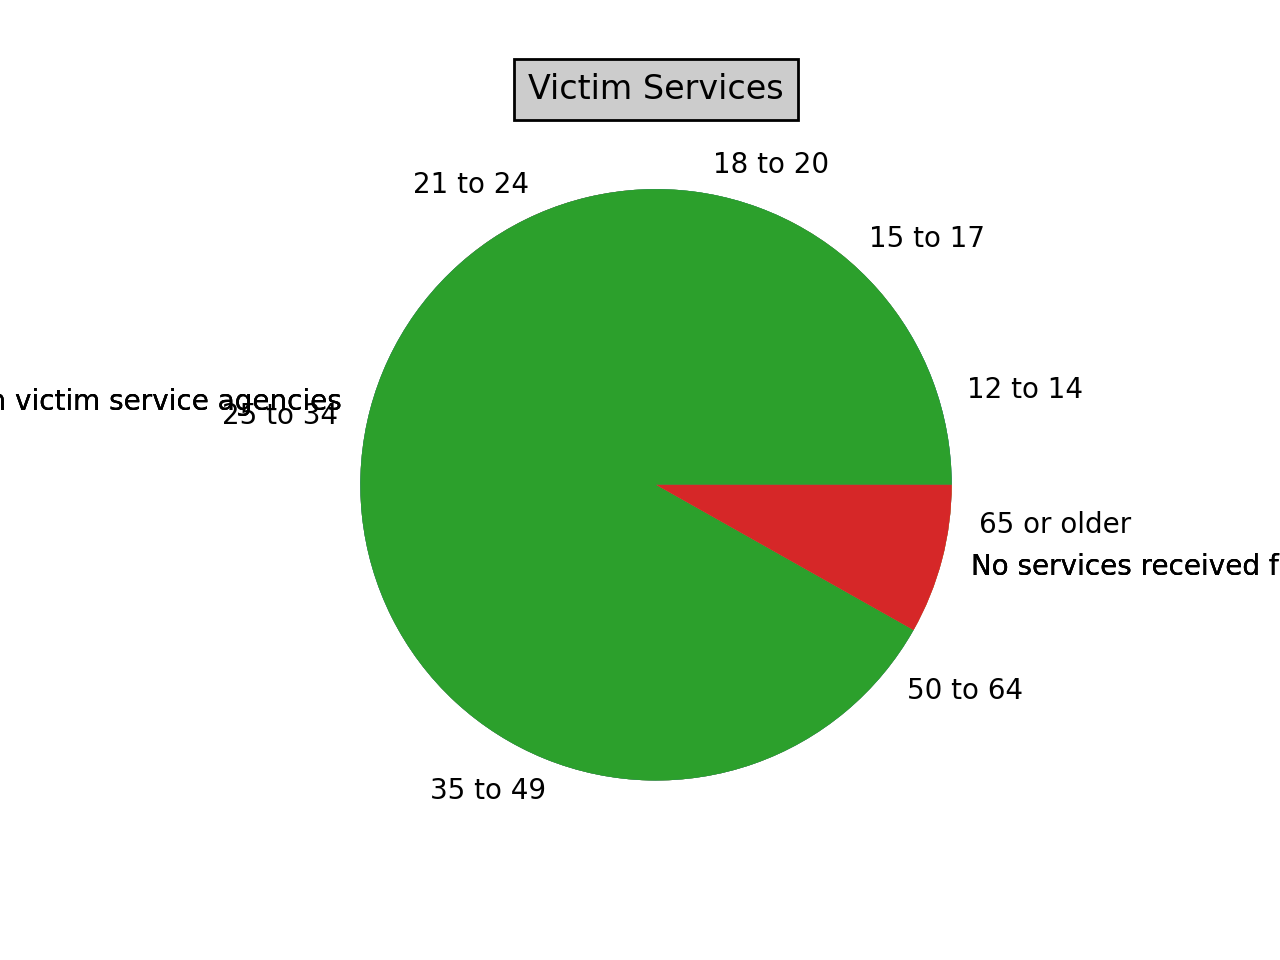

In [173]:
plt.pie(ager_df, labels=labels)
plt.title("Age of victim", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [187]:
plt.show()

In [225]:
#Basic pie charts on the ager and newcrime variables
# Pie Chart "Aggregate type of crime "
newcrime_df = df.groupby("newcrime").count()
newcrime_df

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newoff,seriousviolent,injury,treatment,vicservices,locationr,race1r_vic
newcrime,,,,,,,,,,,,,,,,,,,,,
Personal theft/larceny,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,...,1489,1489,1489,1489,1489,1489,1489,1478,1489,1489
Violent victimization,45571,45571,45571,45571,45571,45571,45571,45571,45571,45571,...,45571,45571,45571,45571,45571,45571,45529,45128,45571,45571


In [226]:
labels = ["Personal theft/larceny", "Violent victimization"]
newcrime_df = newcrime_df["year"].tolist()
newcrime_df

[1489, 45571]

In [227]:
plt.pie(newcrime_df, labels=labels)
plt.title("Aggregate type of crime  (Newcrime)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [228]:
plt.show()


In [230]:
#ValueError: 'label' must be of length 'x'

#hincome - Count or proportion of victims that fall within a certain household income group
hincome_df = df.groupby("hincome").count()
hincome_df

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,popsize,region,...,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr,race1r_vic
hincome,,,,,,,,,,,,,,,,,,,,,
"$15,000 to $24,999",5672,5672,5672,5672,5672,5672,5672,5672,5672,5672,...,5672,5672,5672,5672,5672,5672,5668,5628,5672,5672
"$25,000 to $34,999",5240,5240,5240,5240,5240,5240,5240,5240,5240,5240,...,5240,5240,5240,5240,5240,5240,5232,5212,5240,5240
"$35,000 to $49,999",5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,...,5999,5999,5999,5999,5999,5999,5997,5955,5999,5999
"$50,000 to $74,999",6022,6022,6022,6022,6022,6022,6022,6022,6022,6022,...,6022,6022,6022,6022,6022,6022,6014,5980,6022,6022
"$7,500 to $14,999",4966,4966,4966,4966,4966,4966,4966,4966,4966,4966,...,4966,4966,4966,4966,4966,4966,4962,4930,4966,4966
"$75,000 or more",7450,7450,7450,7450,7450,7450,7450,7450,7450,7450,...,7450,7450,7450,7450,7450,7450,7445,7395,7450,7450
"Less than $7,500",3851,3851,3851,3851,3851,3851,3851,3851,3851,3851,...,3851,3851,3851,3851,3851,3851,3847,3807,3851,3851
Unknown,7860,7860,7860,7860,7860,7860,7860,7860,7860,7860,...,7860,7860,7860,7860,7860,7860,7853,7699,7860,7860


In [236]:
labels = ["Less than $7,500", "$7,500 to $15,000", "$15,000 to $24,999", "$25,000 to $34,999", "$35,000 to $49,999", "$50,000 to $74,999","75,000 and more"]
hincome_df = hincome_df["year"].tolist()
hincome_df

[5672, 5240, 5999, 6022, 4966, 7450, 3851, 7860]

In [237]:
#ValueError: 'label' must be of length 'x'

plt.pie(newcrime_df, labels=labels)
plt.title("Household Income", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

ValueError: 'label' must be of length 'x'

In [28]:
# Pie Chart "Weapon category"
#TypeError: float() argument must be a string or a number, not 'function'

weapon_cat = ["No weapon", "Firearm", "Knife", "Other type weapon", "Type weapon unknown", "Do not know if offender had weapon"]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0,0,0,0,0,0,0,0)


In [29]:
#TypeError: float() argument must be a string or a number, not 'function'

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(_, explode=explode, labels=weapon_cat, colors=colors, shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen

plt.show()

TypeError: float() argument must be a string or a number, not 'function'

In [30]:
#nameError: name 'year' is not defined
# Bar Chart "Location vs Years"
year_group = year.groupby["year"]

# Count how many times each maker appears in our group
year_count = year_group["year"].count()

year_count

NameError: name 'year' is not defined

In [270]:
# Bar Chart "Location vs Years"
locations = ["At or near victim's home","At or near friend, neighbor, or relative's home", "Commercial place, parking lot, or other public area","Other location"]
years = [8.6, 8.5, 8.3, 7.9, 7.2]
#x_axis = np.arange(len(years))

# Create a bar chart based upon the above data
plt.bar(x_axis, years, color="b", align="center")


<BarContainer object of 5 artists>

In [272]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, years)

([<matplotlib.axis.XTick at 0x213d1748a30>,
 [Text(0, 0, '8.6'),
  Text(0, 0, '8.5'),
  Text(0, 0, '8.3'),
  Text(0, 0, '7.9'),
  Text(0, 0, '7.2')])

In [273]:
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 4.75)

In [274]:
plt.title("Location vs Years")
plt.xlabel("Years")
plt.ylabel("Location")

Text(275.288888888889, 0.5, 'Location')

In [276]:
plt.show()

In [ ]:
# Bar Chart "Weight vs Years"
# Can be useful in comparision with stock market data trends in certain years

In [ ]:
# Bar Chart "Victimization Weight vs Age"


In [ ]:
# Bar Chart "Victimization Weight vs Income"

In [31]:
# Bar Charts
crime_outcomes = ["seriousviolent", "injury", "treatment"]
weight = []
x_axis = np.arange(len(weight))

In [32]:
plt.bar(x_axis, weight, color="b", align="center")

<BarContainer object of 5 artists>

In [34]:
tick_crimeoutcomes = [value for value in x_axis]
plt.xticks(tick_crimeoutcomes, crime_outcomes)

([<matplotlib.axis.XTick at 0x213d0a00b20>,
 [Text(0, 0, 'seriousviolent'), Text(0, 0, 'injury'), Text(0, 0, 'treatment')])

In [35]:
plt.show()